In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_test = pd.read_csv('titanic/test.csv')
x_train  = pd.read_csv('titanic/train.csv')
x_test_copy = pd.read_csv('titanic/test copy.csv')
x_test.head(5)
# x_train.sample(5)
x_test.describe()
x_train.sample(5)
# x_train.info()

In [5]:
x_train.drop(['PassengerId', 'Ticket', 'Cabin','Name'],'columns' ,inplace=True)
x_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


/tmp/ipykernel_1886/1863921231.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train.drop(['PassengerId', 'Ticket', 'Cabin','Name'],'columns' ,inplace=True)


In [6]:
x_train[x_train.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [7]:
x_train= x_train.dropna()

In [8]:
pd.crosstab(x_train['Sex'], x_train['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [9]:
pd.crosstab(x_train['Pclass'], x_train['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [ ]:
# pd.crosstab(x_train['Age'], x_train['Survived'])

In [10]:
x_train_corr = x_train.corr()
x_train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187897,0.093142
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187897,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093142,0.139860,0.206624,1.000000


* To look at correlation data draw a heatmap

<AxesSubplot:>

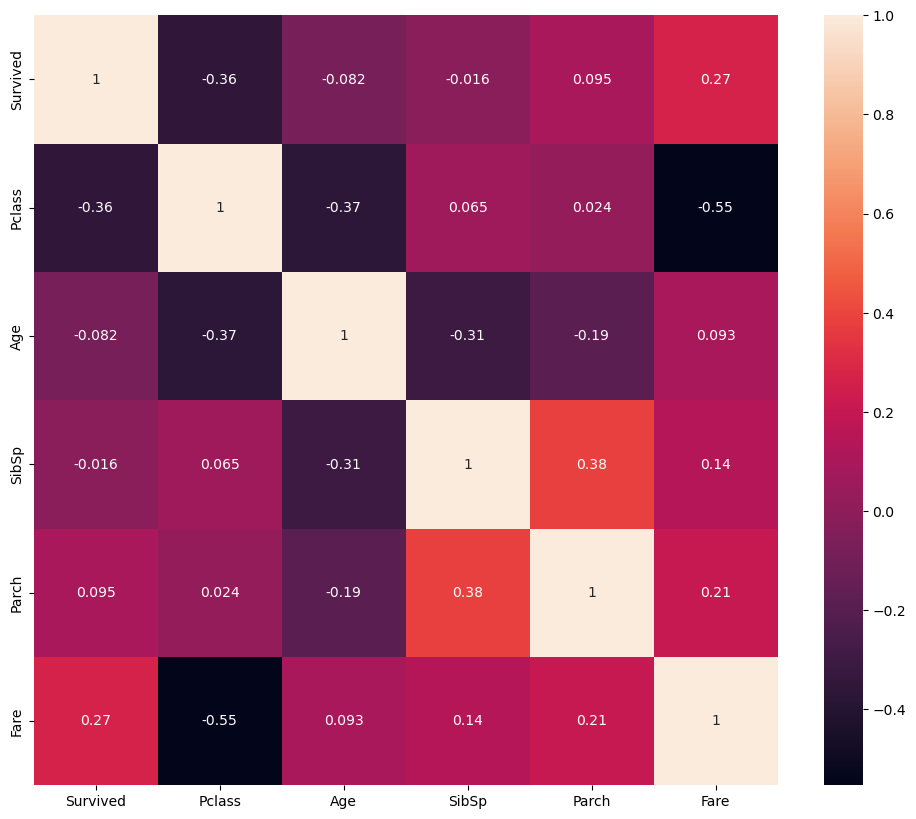

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(x_train_corr, annot=True)

In [12]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
x_train['Sex'] = label_encoding.fit_transform(x_train['Sex'].astype(str))
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [13]:
x_train = pd.get_dummies(x_train, columns=['Embarked'])

In [ ]:
x_train.drop(columns='Embark', axis=1, inplace=True)

In [15]:
x_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [16]:
x_train = x_train.sample(frac=1).reset_index(drop=True)
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,15.0,1,1,7.2292,1,0,0
1,1,3,0,29.0,0,2,15.2458,1,0,0
2,0,1,1,28.0,0,0,47.1000,0,0,1
3,0,3,0,2.0,0,1,10.4625,0,0,1
4,0,3,1,20.0,0,0,8.6625,0,0,1


In [17]:
x_train.to_csv('titanic/titanic_processed.csv', index=False)

In [18]:
!ls titanic

test.csv  titanic_processed.csv  train.csv


In [19]:
titanic_dt = pd.read_csv('titanic/titanic_processed.csv')
titanic_dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,15.0,1,1,7.2292,1,0,0
1,1,3,0,29.0,0,2,15.2458,1,0,0
2,0,1,1,28.0,0,0,47.1000,0,0,1
3,0,3,0,2.0,0,1,10.4625,0,0,1
4,0,3,1,20.0,0,0,8.6625,0,0,1


In [20]:
from sklearn.model_selection import train_test_split
X = titanic_dt.drop('Survived',axis=1)
Y = titanic_dt['Survived']

x_train, x_test, y_train, y_test  = train_test_split(X, Y, test_size=0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2',C=2.0, solver='liblinear').fit(x_train, y_train)


In [22]:
y_pred = logistic_model.predict(x_test)

In [23]:
pred_results = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

In [24]:
pred_results.sample(5)

,y_test,y_pred
186,0,0
331,1,1
137,1,1
625,1,1
386,1,1


In [25]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

In [26]:
titanic_crosstab

y_test,0,1
y_pred,,
0,65,21
1,7,50


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [28]:
acc= accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [29]:
print(f"The Accuracy :: {acc}")
print(f"Precision :: {prec}")
print(f"The recall :: {recall}")

The Accuracy :: 0.8041958041958042
Precision :: 0.8771929824561403
The recall :: 0.704225352112676


# `Multiple Classification Models`

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [31]:
titanic_df = pd.read_csv('titanic/titanic_processed.csv')

In [32]:
FEATURES = list(titanic_df.columns[1:])
FEATURES

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [33]:
result_dict = {}


In [34]:
def summarize_classification(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)# number of accurately predicted scores
    prec= precision_score(y_test, y_pred)
    recall = precision_score(y_test, y_pred)

    return {'accuracy':acc,
            'precision':prec,
            'recall':recall,
            'accuracy_count':num_acc
    }

In [38]:
def build_model(classifier_fn, dataset, column_name, column_names, test_size=0.2,):
    X = dataset[column_names]
    Y = dataset[column_name]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_size)

    model = classifier_fn(x_train, y_train)

    y_pred = model.predict(x_test)

    y_pred_train = model.predict(x_train)

    test_summary = summarize_classification(y_test, y_pred)
    train_summary = summarize_classification(y_train, y_pred_train)

    pred_results = pd.DataFrame({'y_test':y_test,
    'y_pred':y_pred})

    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

    return {'training': train_summary,
            'test': test_summary,
            'confusion_matrix':model_crosstab
    }


    



In [39]:
def compare_results():
    for key in result_dict:
        print("Classification: ", key)

        print()
        print("Training data")
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])

        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])

        print()

In [40]:
def logistic_fn(x_train,y_train):
    model = LogisticRegression(solver='liblinear', C=2.0, penalty='l2' )
    model.fit(x_train, y_train)
    return model

In [41]:
result_dict['survived ~ logistic'] = build_model(logistic_fn, titanic_df, 'Survived', FEATURES, )
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.7961335676625659
precision 0.7729468599033816
recall 0.7729468599033816
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7857142857142857
recall 0.7857142857142857
accuracy_count 116



In [45]:
def linear_discriminant_fn(x_train, y_train, solver="svd"):
    
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train, y_train)

    return model

In [50]:
result_dict['survived ~ linear_discriminant_analysis'] = build_model(linear_discriminant_fn,titanic_df,
"Survived", FEATURES[0:-1])

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.7961335676625659
precision 0.7729468599033816
recall 0.7729468599033816
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7857142857142857
recall 0.7857142857142857
accuracy_count 116

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.7908611599297012
precision 0.7562189054726368
recall 0.7562189054726368
accuracy_count 450

Test data
accuracy 0.8111888111888111
precision 0.819672131147541
recall 0.819672131147541
accuracy_count 116



In [52]:
def quadratic_discriminant_fn(x_train, y_train):
    model = QuadraticDiscriminantAnalysis()
    model.fit(x_train, y_train)

    return model

In [55]:
result_dict['survived ~ quadratic_discriminant_analysis'] = build_model(quadratic_discriminant_fn, titanic_df, 'Survived', FEATURES[0:-1])
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.7961335676625659
precision 0.7729468599033816
recall 0.7729468599033816
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7857142857142857
recall 0.7857142857142857
accuracy_count 116

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.7908611599297012
precision 0.7562189054726368
recall 0.7562189054726368
accuracy_count 450

Test data
accuracy 0.8111888111888111
precision 0.819672131147541
recall 0.819672131147541
accuracy_count 116

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.8014059753954306
precision 0.7596153846153846
recall 0.7596153846153846
accuracy_count 456

Test data
accuracy 0.8041958041958042
precision 0.8421052631578947
recall 0.8421052631578947
accuracy_count 115



In [75]:
def sgd_fn(x_train, y_train, max_iter = 100000, tol=1e-3):

    model = SGDClassifier(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)

    return model

In [76]:
result_dict['survived ~ sgd'] = build_model(sgd_fn, titanic_df, 'Survived', FEATURES)
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.7961335676625659
precision 0.7729468599033816
recall 0.7729468599033816
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7857142857142857
recall 0.7857142857142857
accuracy_count 116

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.7908611599297012
precision 0.7562189054726368
recall 0.7562189054726368
accuracy_count 450

Test data
accuracy 0.8111888111888111
precision 0.819672131147541
recall 0.819672131147541
accuracy_count 116

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.8014059753954306
precision 0.7596153846153846
recall 0.7596153846153846
accuracy_count 456

Test data
accuracy 0.8041958041958042
precision 0.8421052631578947
recall 0.8421052631578947
accuracy_count 115

Classification:  survived ~ sgd

Training data
accuracy 0.7434094903339191
precision 0.6861924686192469
recall 0.6861924686192469
accuracy_count 423

Test 

In [86]:
def linear_svc_fn(x_train, y_train, C=.3, max_iter = 70000, tol = 1e-3):

    model = LinearSVC(C=C, tol=tol, max_iter=max_iter, dual=False)
    model.fit(x_train, y_train)
    return model

In [87]:
result_dict['Classification ~ svd'] = build_model(linear_svc_fn, titanic_df, 'Survived', FEATURES)
compare_results()


Classification:  survived ~ logistic

Training data
accuracy 0.7961335676625659
precision 0.7729468599033816
recall 0.7729468599033816
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7857142857142857
recall 0.7857142857142857
accuracy_count 116

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.7908611599297012
precision 0.7562189054726368
recall 0.7562189054726368
accuracy_count 450

Test data
accuracy 0.8111888111888111
precision 0.819672131147541
recall 0.819672131147541
accuracy_count 116

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.8014059753954306
precision 0.7596153846153846
recall 0.7596153846153846
accuracy_count 456

Test data
accuracy 0.8041958041958042
precision 0.8421052631578947
recall 0.8421052631578947
accuracy_count 115

Classification:  survived ~ sgd

Training data
accuracy 0.7434094903339191
precision 0.6861924686192469
recall 0.6861924686192469
accuracy_count 423

Test 

In [99]:
def radius_neighbor_fn(x_train, y_train, radius=40.0):
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train, y_train)

    return model

In [100]:
result_dict['Classification ~ RadiusNeighborsClassifier'] = build_model(radius_neighbor_fn, titanic_df, 'Survived', FEATURES)
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.7961335676625659
precision 0.7729468599033816
recall 0.7729468599033816
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7857142857142857
recall 0.7857142857142857
accuracy_count 116

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.7908611599297012
precision 0.7562189054726368
recall 0.7562189054726368
accuracy_count 450

Test data
accuracy 0.8111888111888111
precision 0.819672131147541
recall 0.819672131147541
accuracy_count 116

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.8014059753954306
precision 0.7596153846153846
recall 0.7596153846153846
accuracy_count 456

Test data
accuracy 0.8041958041958042
precision 0.8421052631578947
recall 0.8421052631578947
accuracy_count 115

Classification:  survived ~ sgd

Training data
accuracy 0.7434094903339191
precision 0.6861924686192469
recall 0.6861924686192469
accuracy_count 423

Test 

In [103]:
def decision_tree_fn(x_train, y_train, max_depth=None, max_features = None):
    model = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features)
    model.fit(x_train, y_train)
    return model

In [104]:
result_dict['Classification ~ decision_tree'] = build_model(decision_tree_fn, titanic_df, 'Survived', FEATURES)
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.7961335676625659
precision 0.7729468599033816
recall 0.7729468599033816
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7857142857142857
recall 0.7857142857142857
accuracy_count 116

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.7908611599297012
precision 0.7562189054726368
recall 0.7562189054726368
accuracy_count 450

Test data
accuracy 0.8111888111888111
precision 0.819672131147541
recall 0.819672131147541
accuracy_count 116

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.8014059753954306
precision 0.7596153846153846
recall 0.7596153846153846
accuracy_count 456

Test data
accuracy 0.8041958041958042
precision 0.8421052631578947
recall 0.8421052631578947
accuracy_count 115

Classification:  survived ~ sgd

Training data
accuracy 0.7434094903339191
precision 0.6861924686192469
recall 0.6861924686192469
accuracy_count 423

Test 

In [105]:
def naive_bayes_fn(x_train, y_train, priors=None):

    model = GaussianNB(priors=priors)
    model.fit(x_train, y_train)

    return model

In [106]:
result_dict['Classification ~ naive_bayes'] = build_model(naive_bayes_fn, titanic_df, "Survived", FEATURES)
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 0.7961335676625659
precision 0.7729468599033816
recall 0.7729468599033816
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7857142857142857
recall 0.7857142857142857
accuracy_count 116

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.7908611599297012
precision 0.7562189054726368
recall 0.7562189054726368
accuracy_count 450

Test data
accuracy 0.8111888111888111
precision 0.819672131147541
recall 0.819672131147541
accuracy_count 116

Classification:  survived ~ quadratic_discriminant_analysis

Training data
accuracy 0.8014059753954306
precision 0.7596153846153846
recall 0.7596153846153846
accuracy_count 456

Test data
accuracy 0.8041958041958042
precision 0.8421052631578947
recall 0.8421052631578947
accuracy_count 115

Classification:  survived ~ sgd

Training data
accuracy 0.7434094903339191
precision 0.6861924686192469
recall 0.6861924686192469
accuracy_count 423

Test 